In [124]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
import gzip

In [3]:
data = pd.read_csv('raw_data.csv',compression='gzip')

/var/folders/ck/357lw4vn3zv9tsh9pl19_ycw0000gn/T/ipykernel_886/1259166817.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('raw_data.csv',compression='gzip')


In [4]:
data.head()

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng
0,2020-03-26 07:07:17,14626,12.313621,76.658195,12.287301,76.602280
1,2020-03-26 07:32:27,85490,12.943947,77.560745,12.954014,77.543770
2,2020-03-26 07:36:44,05408,12.899603,77.587300,12.934780,77.569950
3,2020-03-26 07:38:00,58940,12.918229,77.607544,12.968971,77.636375
4,2020-03-26 07:39:29,05408,12.899490,77.587270,12.934780,77.569950


In [5]:
dup_data = data[data.duplicated(subset=['ts','number'],keep=False)]

In [6]:
dup_data.shape[0]

113540

In [7]:
data.shape[0] - dup_data.shape[0]

8268016

In [8]:
data.drop_duplicates(subset=['ts','number'], inplace = True,)

data.reset_index(inplace = True, drop = True)

In [9]:
data.shape

(8315498, 6)

In [10]:
data['number'] = pd.to_numeric(data['number'], errors = 'coerce')

In [11]:
data.head()

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng
0,2020-03-26 07:07:17,14626.0,12.313621,76.658195,12.287301,76.602280
1,2020-03-26 07:32:27,85490.0,12.943947,77.560745,12.954014,77.543770
2,2020-03-26 07:36:44,5408.0,12.899603,77.587300,12.934780,77.569950
3,2020-03-26 07:38:00,58940.0,12.918229,77.607544,12.968971,77.636375
4,2020-03-26 07:39:29,5408.0,12.899490,77.587270,12.934780,77.569950


In [12]:
np.count_nonzero(data.isnull().values)

116

In [13]:
data.dropna(inplace = True)

In [14]:
data.shape

(8315382, 6)

In [15]:
data['number'] = pd.to_numeric(data['number'], errors = 'coerce', downcast='integer')
data['ts'] = pd.to_datetime(data['ts'])

In [16]:
data.head()

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng
0,2020-03-26 07:07:17,14626,12.313621,76.658195,12.287301,76.602280
1,2020-03-26 07:32:27,85490,12.943947,77.560745,12.954014,77.543770
2,2020-03-26 07:36:44,5408,12.899603,77.587300,12.934780,77.569950
3,2020-03-26 07:38:00,58940,12.918229,77.607544,12.968971,77.636375
4,2020-03-26 07:39:29,5408,12.899490,77.587270,12.934780,77.569950


In [17]:
data['hour'] = data['ts'].dt.hour
data['mins'] = data['ts'].dt.minute
data['day'] = data['ts'].dt.day
data['month'] = data['ts'].dt.month
data['year'] = data['ts'].dt.year
data['dayofweek'] = data['ts'].dt.dayofweek

In [18]:
data.head()

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,hour,mins,day,month,year,dayofweek
0,2020-03-26 07:07:17,14626,12.313621,76.658195,12.287301,76.602280,7,7,26,3,2020,3
1,2020-03-26 07:32:27,85490,12.943947,77.560745,12.954014,77.543770,7,32,26,3,2020,3
2,2020-03-26 07:36:44,5408,12.899603,77.587300,12.934780,77.569950,7,36,26,3,2020,3
3,2020-03-26 07:38:00,58940,12.918229,77.607544,12.968971,77.636375,7,38,26,3,2020,3
4,2020-03-26 07:39:29,5408,12.899490,77.587270,12.934780,77.569950,7,39,26,3,2020,3


In [19]:
data.shape

(8315382, 12)

In [20]:
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
import time
geolocator = Nominatim(user_agent="OLABikes")

In [21]:
data['ts'] = pd.to_datetime(data['ts'])
data.sort_values(by = ['number','ts'], inplace = True)
data.reset_index(inplace = True)

In [22]:
data.head()

,index,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,hour,mins,day,month,year,dayofweek
0,2374421,2020-10-10 07:34:16,-1,12.975773,77.57107,12.878468,77.44533,7,34,10,10,2020,5
1,2405937,2020-10-11 08:23:42,-1,12.930813,77.60953,12.960320,77.58721,8,23,11,10,2020,6
2,2405938,2020-10-11 08:23:50,-1,12.930813,77.60953,12.960320,77.58721,8,23,11,10,2020,6
3,2405939,2020-10-11 08:23:51,-1,12.930813,77.60953,12.960320,77.58721,8,23,11,10,2020,6
4,2405940,2020-10-11 08:23:54,-1,12.930813,77.60953,12.960320,77.58721,8,23,11,10,2020,6


In [23]:
data['booking_timestamp'] = data.ts.values.astype(np.int64)//10**9

In [24]:
data.head()

,index,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,hour,mins,day,month,year,dayofweek,booking_timestamp
0,2374421,2020-10-10 07:34:16,-1,12.975773,77.57107,12.878468,77.44533,7,34,10,10,2020,5,1602315256
1,2405937,2020-10-11 08:23:42,-1,12.930813,77.60953,12.960320,77.58721,8,23,11,10,2020,6,1602404622
2,2405938,2020-10-11 08:23:50,-1,12.930813,77.60953,12.960320,77.58721,8,23,11,10,2020,6,1602404630
3,2405939,2020-10-11 08:23:51,-1,12.930813,77.60953,12.960320,77.58721,8,23,11,10,2020,6,1602404631
4,2405940,2020-10-11 08:23:54,-1,12.930813,77.60953,12.960320,77.58721,8,23,11,10,2020,6,1602404634


In [25]:
data.head(50)

,index,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,hour,mins,day,month,year,dayofweek,booking_timestamp
0,2374421,2020-10-10 07:34:16,-1,12.975773,77.571070,12.878468,77.445330,7,34,10,10,2020,5,1602315256
1,2405937,2020-10-11 08:23:42,-1,12.930813,77.609530,12.960320,77.587210,8,23,11,10,2020,6,1602404622
2,2405938,2020-10-11 08:23:50,-1,12.930813,77.609530,12.960320,77.587210,8,23,11,10,2020,6,1602404630
3,2405939,2020-10-11 08:23:51,-1,12.930813,77.609530,12.960320,77.587210,8,23,11,10,2020,6,1602404631
4,2405940,2020-10-11 08:23:54,-1,12.930813,77.609530,12.960320,77.587210,8,23,11,10,2020,6,1602404634
5,2405941,2020-10-11 08:23:56,-1,12.930813,77.609530,12.960320,77.587210,8,23,11,10,2020,6,1602404636
6,2406119,2020-10-11 11:57:17,-1,12.960213,77.587460,12.930824,77.609610,11,57,11,10,2020,6,1602417437
7,2406120,2020-10-11 11:57:31,-1,12.960213,77.587460,12.930824,77.609610,11,57,11,10,2020,6,1602417451
8,2500520,2020-10-16 17:51:07,-1,12.924353,77.549410,12.932216,77.581825,17,51,16,10,2020,4,1602870667
9,2500521,2020-10-16 17:51:25,-1,12.924353,77.549410,12.932216,77.581825,17,51,16,10,2020,4,1602870685


In [26]:
data['shift_booking_ts'] = data.groupby('number')['booking_timestamp'].shift(1)
data['shift_booking_ts'].fillna(0, inplace = True)

In [27]:
data.head()

,index,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,hour,mins,day,month,year,dayofweek,booking_timestamp,shift_booking_ts
0,2374421,2020-10-10 07:34:16,-1,12.975773,77.57107,12.878468,77.44533,7,34,10,10,2020,5,1602315256,0.000000e+00
1,2405937,2020-10-11 08:23:42,-1,12.930813,77.60953,12.960320,77.58721,8,23,11,10,2020,6,1602404622,1.602315e+09
2,2405938,2020-10-11 08:23:50,-1,12.930813,77.60953,12.960320,77.58721,8,23,11,10,2020,6,1602404630,1.602405e+09
3,2405939,2020-10-11 08:23:51,-1,12.930813,77.60953,12.960320,77.58721,8,23,11,10,2020,6,1602404631,1.602405e+09
4,2405940,2020-10-11 08:23:54,-1,12.930813,77.60953,12.960320,77.58721,8,23,11,10,2020,6,1602404634,1.602405e+09


In [28]:
data['shift_booking_ts'] = data['shift_booking_ts'].astype('int64')

In [29]:
data['booking_time_diff_hr'] = round((data['booking_timestamp'] - data['shift_booking_ts'])//3600)
data['booking_time_diff_min'] = round((data['booking_timestamp'] - data['shift_booking_ts'])//60)

In [30]:
data.head()

,index,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,hour,mins,day,month,year,dayofweek,booking_timestamp,shift_booking_ts,booking_time_diff_hr,booking_time_diff_min
0,2374421,2020-10-10 07:34:16,-1,12.975773,77.57107,12.878468,77.44533,7,34,10,10,2020,5,1602315256,0,445087,26705254
1,2405937,2020-10-11 08:23:42,-1,12.930813,77.60953,12.960320,77.58721,8,23,11,10,2020,6,1602404622,1602315256,24,1489
2,2405938,2020-10-11 08:23:50,-1,12.930813,77.60953,12.960320,77.58721,8,23,11,10,2020,6,1602404630,1602404622,0,0
3,2405939,2020-10-11 08:23:51,-1,12.930813,77.60953,12.960320,77.58721,8,23,11,10,2020,6,1602404631,1602404630,0,0
4,2405940,2020-10-11 08:23:54,-1,12.930813,77.60953,12.960320,77.58721,8,23,11,10,2020,6,1602404634,1602404631,0,0


In [31]:
data['booking_time_diff_min'].value_counts().to_dict()

{0: 2801749,
 1: 799993,
 2: 307831,
 3: 167954,
 4: 109141,
 5: 77918,
 6: 60416,
 7: 48342,
 8: 40404,
 9: 34407,
 10: 29977,
 11: 26091,
 12: 23336,
 13: 20839,
 14: 18945,
 15: 16872,
 16: 15467,
 17: 13885,
 18: 12804,
 19: 11870,
 20: 10869,
 21: 10105,
 22: 9397,
 23: 8810,
 24: 8185,
 25: 7752,
 26: 7255,
 27: 6898,
 28: 6610,
 29: 6263,
 30: 6034,
 31: 5773,
 1439: 5725,
 1440: 5712,
 32: 5702,
 1438: 5489,
 1437: 5402,
 1441: 5391,
 33: 5349,
 1442: 5303,
 1443: 5178,
 34: 5094,
 1436: 5076,
 35: 4965,
 1435: 4962,
 36: 4907,
 1444: 4861,
 38: 4780,
 37: 4757,
 1434: 4724,
 1433: 4662,
 1445: 4581,
 39: 4542,
 40: 4464,
 41: 4416,
 1432: 4407,
 1446: 4401,
 42: 4292,
 43: 4213,
 1431: 4170,
 44: 4133,
 1447: 4123,
 1430: 4038,
 45: 4016,
 1448: 3993,
 47: 3989,
 46: 3977,
 48: 3931,
 50: 3872,
 1449: 3838,
 1429: 3836,
 51: 3817,
 49: 3807,
 53: 3693,
 52: 3659,
 1428: 3644,
 54: 3643,
 55: 3624,
 1427: 3611,
 56: 3577,
 59: 3563,
 1450: 3552,
 1426: 3521,
 63: 3449,
 57: 344

In [32]:
data['booking_time_diff_hr'].value_counts()

0         4849856
1          164914
23         152962
24         132454
2          118199
           ...   
7374            1
447102          1
7394            1
5343            1
7787            1
Name: booking_time_diff_hr, Length: 14452, dtype: int64

In [33]:
data = data[~((data.duplicated(subset=['number','pick_lat','pick_lng'],keep=False)) & (data.booking_time_diff_hr<=1))]

In [34]:
data.shape

(4335820, 17)

In [35]:
print("Number of rides booked by same customer within 8mins time: {}".format(len(data[(data.booking_time_diff_min<8)])))
data = data[(data.booking_time_diff_min>=8)]

Number of rides booked by same customer within 8mins time: 611880


In [36]:
%%time
def geodestic_distance(pick_lat, pick_lng, drop_lat, drop_lng):
    # 1mile = 1.60934 Kms
    return round(geodesic((pick_lat, pick_lng), (drop_lat, drop_lng)).miles*1.60934,2)

data['geodesic_distance'] = np.vectorize(geodestic_distance)(data['pick_lat'],data['pick_lng'],data['drop_lat'],data['drop_lng'])

CPU times: user 5min 10s, sys: 999 ms, total: 5min 11s
Wall time: 5min 12s


In [37]:
data[data['geodesic_distance']<=0.5]['geodesic_distance'].value_counts()

0.00    6618
0.01    2492
0.02    2011
0.03    1371
0.50    1210
0.04    1090
0.47    1076
0.49    1067
0.48    1064
0.46    1056
0.44     895
0.45     881
0.05     877
0.43     845
0.41     765
0.39     758
0.06     752
0.42     748
0.40     747
0.38     682
0.37     675
0.07     655
0.36     641
0.33     594
0.08     592
0.34     585
0.35     582
0.09     549
0.32     542
0.31     530
0.10     498
0.11     492
0.30     490
0.29     476
0.12     457
0.28     447
0.26     439
0.27     432
0.14     410
0.17     408
0.21     404
0.20     397
0.24     391
0.22     390
0.13     385
0.18     369
0.23     368
0.15     364
0.19     355
0.25     342
0.16     339
Name: geodesic_distance, dtype: int64

In [38]:
print("Number of Rides Requests less than 50meters: {}".format(len(data[data.geodesic_distance<=0.05])))

Number of Rides Requests less than 50meters: 14459


In [39]:
data = data[data.geodesic_distance>0.05]

In [40]:
data.head()

,index,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,hour,mins,day,month,year,dayofweek,booking_timestamp,shift_booking_ts,booking_time_diff_hr,booking_time_diff_min,geodesic_distance
0,2374421,2020-10-10 07:34:16,-1,12.975773,77.57107,12.878468,77.445330,7,34,10,10,2020,5,1602315256,0,445087,26705254,17.38
1,2405937,2020-10-11 08:23:42,-1,12.930813,77.60953,12.960320,77.587210,8,23,11,10,2020,6,1602404622,1602315256,24,1489,4.06
6,2406119,2020-10-11 11:57:17,-1,12.960213,77.58746,12.930824,77.609610,11,57,11,10,2020,6,1602417437,1602404636,3,213,4.04
8,2500520,2020-10-16 17:51:07,-1,12.924353,77.54941,12.932216,77.581825,17,51,16,10,2020,4,1602870667,1602417451,125,7553,3.62
10,2694552,2020-10-30 09:00:44,-1,12.945731,77.62250,12.973030,77.616840,9,0,30,10,2020,4,1604048444,1602870685,327,19629,3.08


In [41]:
data.shape

(3709481, 18)

In [42]:
location = geolocator.geocode("India")
location.raw

{'place_id': 297491427,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'relation',
 'osm_id': 304716,
 'boundingbox': ['6.5531169', '35.6745457', '67.9544415', '97.395561'],
 'lat': '22.3511148',
 'lon': '78.6677428',
 'display_name': 'India',
 'class': 'boundary',
 'type': 'administrative',
 'importance': 0.957689135880987,
 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_boundary_administrative.p.20.png'}

In [43]:
data[(data.pick_lat<=6.2325274) | (data.pick_lat>=35.6745457) | (data.pick_lng<=68.1113787) | (data.pick_lng>=97.395561) | (data.drop_lat<=6.2325274) | (data.drop_lat>=35.6745457) | (data.drop_lng<=68.1113787) | (data.drop_lng>=97.395561)]

,index,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,hour,mins,day,month,year,dayofweek,booking_timestamp,shift_booking_ts,booking_time_diff_hr,booking_time_diff_min,geodesic_distance
9000,742074,2020-06-22 07:19:06,80,12.926255,77.616400,0.000000e+00,0.000000e+00,7,19,22,6,2020,0,1592810346,1590934080,521,31271,8674.57
28700,2502302,2020-10-16 21:52:28,297,12.958342,77.517876,3.890229e+00,-3.344596e+01,21,52,16,10,2020,4,1602885148,1602884658,0,8,12181.79
31484,4344798,2021-01-07 13:17:11,345,12.824208,77.684840,5.347187e+01,-1.021332e+02,13,17,7,1,2021,3,1610025431,1609843045,50,3039,12658.48
44030,8297594,2021-03-26 20:16:01,485,12.932975,77.536230,2.819774e+01,1.129942e+02,20,16,26,3,2021,4,1616789761,1616697903,25,1530,4043.95
56899,1786638,2020-09-09 09:36:43,641,12.896367,77.623800,0.000000e+00,0.000000e+00,9,36,9,9,2020,2,1599644203,0,444345,26660736,8675.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8216880,1985177,2020-09-21 14:40:51,98929,12.852040,77.675490,1.400000e-45,1.400000e-45,14,40,21,9,2020,0,1600699251,1600355752,95,5724,8680.58
8230065,834598,2020-07-02 08:40:16,99078,12.924925,77.606125,3.772864e+01,-8.920558e+01,8,40,2,7,2020,3,1593679216,1591804249,520,31249,14231.82
8232720,2331501,2020-10-06 18:12:35,99104,12.928082,77.603350,1.376042e+01,1.004980e+02,18,12,6,10,2020,1,1602007955,1601834214,48,2895,2481.04
8253517,2747886,2020-11-02 18:57:02,99379,12.984081,77.593330,0.000000e+00,0.000000e+00,18,57,2,11,2020,0,1604343422,1604309746,9,561,8672.37


In [44]:
data.reset_index(inplace = True, drop = True)
outside_India = data[(data.pick_lat<=6.2325274) | (data.pick_lat>=35.6745457) | (data.pick_lng<=68.1113787) | (data.pick_lng>=97.395561) | (data.drop_lat<=6.2325274) | (data.drop_lat>=35.6745457) | (data.drop_lng<=68.1113787) | (data.drop_lng>=97.395561)]
data = data[~data.index.isin(outside_India.index)].reset_index(drop = True)

In [45]:
data.head()

,index,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,hour,mins,day,month,year,dayofweek,booking_timestamp,shift_booking_ts,booking_time_diff_hr,booking_time_diff_min,geodesic_distance
0,2374421,2020-10-10 07:34:16,-1,12.975773,77.57107,12.878468,77.445330,7,34,10,10,2020,5,1602315256,0,445087,26705254,17.38
1,2405937,2020-10-11 08:23:42,-1,12.930813,77.60953,12.960320,77.587210,8,23,11,10,2020,6,1602404622,1602315256,24,1489,4.06
2,2406119,2020-10-11 11:57:17,-1,12.960213,77.58746,12.930824,77.609610,11,57,11,10,2020,6,1602417437,1602404636,3,213,4.04
3,2500520,2020-10-16 17:51:07,-1,12.924353,77.54941,12.932216,77.581825,17,51,16,10,2020,4,1602870667,1602417451,125,7553,3.62
4,2694552,2020-10-30 09:00:44,-1,12.945731,77.62250,12.973030,77.616840,9,0,30,10,2020,4,1604048444,1602870685,327,19629,3.08


In [46]:
data.shape

(3708839, 18)

In [47]:
pck_outside_bng = data[(data.pick_lat<=12.8340125) | (data.pick_lat>=13.1436649) | (data.pick_lng<=77.4601025) | (data.pick_lng>=77.7840515)]
drp_outside_bng = data[(data.drop_lat<=12.8340125) | (data.drop_lat>=13.1436649) | (data.drop_lng<=77.4601025) | (data.drop_lng>=77.7840515)]
print("Number of Pickup Requests Outside Bangalore: ",len(pck_outside_bng))
print("Number of Customers pickup outside Bangalore: ",len(np.unique(pck_outside_bng['number'].values)))

print("Number of Drops Requests Outside Bangalore: ",len(drp_outside_bng))
print("Number of Customers Drop outside Bangalore: ",len(np.unique(drp_outside_bng['number'].values)))


Number of Pickup Requests Outside Bangalore:  155907
Number of Customers pickup outside Bangalore:  20472
Number of Drops Requests Outside Bangalore:  167336
Number of Customers Drop outside Bangalore:  26877


In [48]:
pck_outside_KA = data[(data.pick_lat<=11.5945587) | (data.pick_lat>=18.4767308) | (data.pick_lng<=74.0543908) | (data.pick_lng>=78.588083)]
drp_outside_KA = data[(data.drop_lat<=11.5945587) | (data.drop_lat>=18.4767308) | (data.drop_lng<=74.0543908) | (data.drop_lng>=78.588083)]
print("Pickups Outisde KA: {} \nDrop outside KA: {}".format(len(pck_outside_KA),len(drp_outside_KA)))
print("Number of Customers Drop outside KA: ",len(np.unique(drp_outside_KA['number'].values)))
print("Number of Customers pickup outside KA: ",len(np.unique(pck_outside_KA['number'].values)))

Pickups Outisde KA: 38807 
Drop outside KA: 39585
Number of Customers Drop outside KA:  6917
Number of Customers pickup outside KA:  6302


In [49]:
total_ride_outside_KA = data[(data.pick_lat<=11.5945587) | (data.pick_lat>=18.4767308) | (data.pick_lng<=74.0543908) | (data.pick_lng>=78.588083) | (data.drop_lat<=11.5945587) | (data.drop_lat>=18.4767308) | (data.drop_lng<=74.0543908) | (data.drop_lng>=78.588083)]


In [50]:
print("Total Ride Outside Karnataka: {}".format(len(total_ride_outside_KA)))


Total Ride Outside Karnataka: 39632


In [51]:
suspected_bad_rides = total_ride_outside_KA[total_ride_outside_KA.geodesic_distance > 500]
suspected_bad_rides

,index,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,hour,mins,day,month,year,dayofweek,booking_timestamp,shift_booking_ts,booking_time_diff_hr,booking_time_diff_min,geodesic_distance
105,4765453,2021-01-21 23:18:35,0,12.958837,77.644485,21.149794,82.782000,23,18,21,1,2021,3,1611271115,1611219970,14,852,1058.39
7368,1756291,2020-09-08 14:49:08,154,12.922410,77.568270,25.549080,84.655800,14,49,8,9,2020,1,1599576548,1599496883,22,1327,1583.00
38148,586336,2020-06-04 18:13:54,878,12.970724,77.582420,21.504763,80.115160,18,13,4,6,2020,3,1591294434,1591266878,7,459,982.06
40544,122218,2020-04-07 11:09:24,913,13.004375,77.555210,19.075983,72.877655,11,9,7,4,2020,1,1586257764,1586102620,43,2585,837.66
40560,288813,2020-04-29 23:11:41,913,13.013597,77.545740,22.837053,69.724560,23,11,29,4,2020,2,1588201901,1588159989,11,698,1366.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681750,770119,2020-06-25 11:32:12,99395,13.037086,77.515854,28.979435,77.689580,11,32,25,6,2020,3,1593084732,1593016475,18,1137,1765.26
3681751,1086707,2020-07-29 15:29:45,99395,12.975827,77.605644,28.979435,77.689580,15,29,29,7,2020,2,1596036585,1593084811,819,49196,1771.97
3685651,4377343,2021-01-09 14:10:14,99499,12.959066,77.656815,28.479555,77.079950,14,10,9,1,2021,5,1610201414,1610187082,3,238,1719.44
3685652,4377408,2021-01-09 14:57:02,99499,12.959036,77.656770,28.479555,77.079950,14,57,9,1,2021,5,1610204222,1610201414,0,46,1719.45


In [52]:
data = data[~data.index.isin(suspected_bad_rides.index)].reset_index(drop = True)

In [53]:
data.head()

,index,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,hour,mins,day,month,year,dayofweek,booking_timestamp,shift_booking_ts,booking_time_diff_hr,booking_time_diff_min,geodesic_distance
0,2374421,2020-10-10 07:34:16,-1,12.975773,77.57107,12.878468,77.445330,7,34,10,10,2020,5,1602315256,0,445087,26705254,17.38
1,2405937,2020-10-11 08:23:42,-1,12.930813,77.60953,12.960320,77.587210,8,23,11,10,2020,6,1602404622,1602315256,24,1489,4.06
2,2406119,2020-10-11 11:57:17,-1,12.960213,77.58746,12.930824,77.609610,11,57,11,10,2020,6,1602417437,1602404636,3,213,4.04
3,2500520,2020-10-16 17:51:07,-1,12.924353,77.54941,12.932216,77.581825,17,51,16,10,2020,4,1602870667,1602417451,125,7553,3.62
4,2694552,2020-10-30 09:00:44,-1,12.945731,77.62250,12.973030,77.616840,9,0,30,10,2020,4,1604048444,1602870685,327,19629,3.08


In [54]:
data.shape

(3708333, 18)

In [55]:
print("Number of Good Ride Requests: {}".format(len(data)))

Number of Good Ride Requests: 3708333


In [56]:
from copy import deepcopy
from matplotlib import pyplot as plt
from sklearn.cluster import MiniBatchKMeans, KMeans
import gpxpy.geo
from datetime import datetime, timedelta
from joblib import dump, load
import pandas_profiling


In [57]:
coord = data[["pick_lat", "pick_lng"]].values
neighbors = []

In [58]:
def min_distance(regionCenters, totalClusters):
    good_points = 0
    bad_points = 0
    less_dist = []
    more_dist = []
    min_distance = np.inf  #any big number can be given here
    for i in range(totalClusters):
        good_points = 0
        bad_points = 0
        for j in range(totalClusters):
            if j != i:
                distance = gpxpy.geo.haversine_distance(latitude_1 = regionCenters[i][0], longitude_1 = regionCenters[i][1], latitude_2 = regionCenters[j][0], longitude_2 = regionCenters[j][1])
                distance = distance/(1.60934*1000)   #distance from meters to miles
                min_distance = min(min_distance, distance) #it will return minimum of "min_distance, distance".
                if distance < 2:
                    good_points += 1
                else:
                    bad_points += 1
        less_dist.append(good_points)
        more_dist.append(bad_points)
    print("On choosing a cluster size of {}".format(totalClusters))
    print("Avg. Number clusters within vicinity where inter cluster distance < 2 miles is {}".format(np.ceil(sum(less_dist)/len(less_dist))))
    print("Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is {}".format(np.ceil(sum(more_dist)/len(more_dist))))
    print("Minimum distance between any two clusters = {}".format(min_distance))
    print("-"*10)
            
def makingRegions(noOfRegions):
    regions = MiniBatchKMeans(n_clusters = noOfRegions, batch_size = 10000, random_state = 5).fit(coord)
    regionCenters = regions.cluster_centers_ 
    totalClusters = len(regionCenters)
    return regionCenters, totalClusters

In [59]:
startTime = datetime.now()
for i in range(10, 100, 10):
    regionCenters, totalClusters = makingRegions(i)
    min_distance(regionCenters, totalClusters)
print("Time taken = "+str(datetime.now() - startTime))

On choosing a cluster size of 10
Avg. Number clusters within vicinity where inter cluster distance < 2 miles is 0.0
Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is 9.0
Minimum distance between any two clusters = 2.4624146298410876
----------
On choosing a cluster size of 20
Avg. Number clusters within vicinity where inter cluster distance < 2 miles is 1.0
Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is 19.0
Minimum distance between any two clusters = 1.5328180455787632
----------
On choosing a cluster size of 30
Avg. Number clusters within vicinity where inter cluster distance < 2 miles is 2.0
Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is 28.0
Minimum distance between any two clusters = 0.8737715506620141
----------
On choosing a cluster size of 40
Avg. Number clusters within vicinity where inter cluster distance < 2 miles is 3.0
Avg. Number clusters outside of vicinity where inte

In [60]:
coord = data[["pick_lat", "pick_lng"]].values
regions = MiniBatchKMeans(n_clusters = 50, batch_size = 10000, random_state = 0).fit(coord)
data["pickup_cluster"] = regions.predict(data[["pick_lat", "pick_lng"]])

/Users/kunaljain/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


In [61]:
data.head()

,index,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,hour,mins,day,month,year,dayofweek,booking_timestamp,shift_booking_ts,booking_time_diff_hr,booking_time_diff_min,geodesic_distance,pickup_cluster
0,2374421,2020-10-10 07:34:16,-1,12.975773,77.57107,12.878468,77.445330,7,34,10,10,2020,5,1602315256,0,445087,26705254,17.38,20
1,2405937,2020-10-11 08:23:42,-1,12.930813,77.60953,12.960320,77.587210,8,23,11,10,2020,6,1602404622,1602315256,24,1489,4.06,27
2,2406119,2020-10-11 11:57:17,-1,12.960213,77.58746,12.930824,77.609610,11,57,11,10,2020,6,1602417437,1602404636,3,213,4.04,22
3,2500520,2020-10-16 17:51:07,-1,12.924353,77.54941,12.932216,77.581825,17,51,16,10,2020,4,1602870667,1602417451,125,7553,3.62,37
4,2694552,2020-10-30 09:00:44,-1,12.945731,77.62250,12.973030,77.616840,9,0,30,10,2020,4,1604048444,1602870685,327,19629,3.08,44


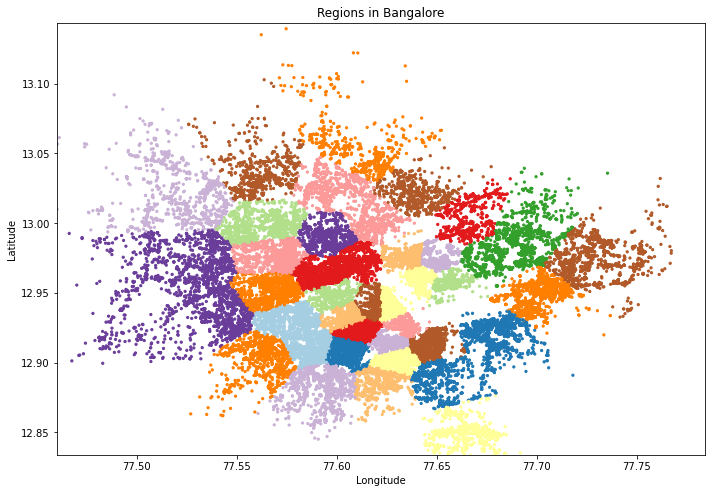

In [62]:
bangalore_latitude_range = (12.8340125, 13.1436649)
bangalore_longitude_range = (77.4601025, 77.7840515)
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.scatter(x = data.pick_lng.values[:100000], y = data.pick_lat.values[:100000], c = data.pickup_cluster.values[:100000], cmap = "Paired", s = 5)
ax.set_xlim(77.4601025, 77.7840515)
ax.set_ylim(12.8340125, 13.1436649)
ax.set_title("Regions in Bangalore")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3708333 entries, 0 to 3708332
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   index                  int64         
 1   ts                     datetime64[ns]
 2   number                 int32         
 3   pick_lat               float64       
 4   pick_lng               float64       
 5   drop_lat               float64       
 6   drop_lng               float64       
 7   hour                   int64         
 8   mins                   int64         
 9   day                    int64         
 10  month                  int64         
 11  year                   int64         
 12  dayofweek              int64         
 13  booking_timestamp      int64         
 14  shift_booking_ts       int64         
 15  booking_time_diff_hr   int64         
 16  booking_time_diff_min  int64         
 17  geodesic_distance      float64       
 18  pickup_cluster        

In [76]:
def round_timestamp_30interval(x):
    x = pd.Timestamp(x)
    return x- timedelta(minutes=x.minute%30, seconds=x.second, microseconds=x.microsecond)

data['ts'] = np.vectorize(round_timestamp_30interval)(data['ts'])

In [77]:
data.head()

,index,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,hour,mins,day,month,year,dayofweek,booking_timestamp,shift_booking_ts,booking_time_diff_hr,booking_time_diff_min,geodesic_distance,pickup_cluster
0,2374421,2020-10-10 07:30:00,-1,12.975773,77.57107,12.878468,77.445330,7,34,10,10,2020,5,1602315256,0,445087,26705254,17.38,20
1,2405937,2020-10-11 08:00:00,-1,12.930813,77.60953,12.960320,77.587210,8,23,11,10,2020,6,1602404622,1602315256,24,1489,4.06,27
2,2406119,2020-10-11 11:30:00,-1,12.960213,77.58746,12.930824,77.609610,11,57,11,10,2020,6,1602417437,1602404636,3,213,4.04,22
3,2500520,2020-10-16 17:30:00,-1,12.924353,77.54941,12.932216,77.581825,17,51,16,10,2020,4,1602870667,1602417451,125,7553,3.62,37
4,2694552,2020-10-30 09:00:00,-1,12.945731,77.62250,12.973030,77.616840,9,0,30,10,2020,4,1604048444,1602870685,327,19629,3.08,44


In [78]:
dataset = deepcopy(data)
dataset.ts = pd.to_datetime(dataset.ts)

In [79]:
dataset.head()

,index,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,hour,mins,day,month,year,dayofweek,booking_timestamp,shift_booking_ts,booking_time_diff_hr,booking_time_diff_min,geodesic_distance,pickup_cluster
0,2374421,2020-10-10 07:30:00,-1,12.975773,77.57107,12.878468,77.445330,7,34,10,10,2020,5,1602315256,0,445087,26705254,17.38,20
1,2405937,2020-10-11 08:00:00,-1,12.930813,77.60953,12.960320,77.587210,8,23,11,10,2020,6,1602404622,1602315256,24,1489,4.06,27
2,2406119,2020-10-11 11:30:00,-1,12.960213,77.58746,12.930824,77.609610,11,57,11,10,2020,6,1602417437,1602404636,3,213,4.04,22
3,2500520,2020-10-16 17:30:00,-1,12.924353,77.54941,12.932216,77.581825,17,51,16,10,2020,4,1602870667,1602417451,125,7553,3.62,37
4,2694552,2020-10-30 09:00:00,-1,12.945731,77.62250,12.973030,77.616840,9,0,30,10,2020,4,1604048444,1602870685,327,19629,3.08,44


In [80]:
dataset = dataset[['ts','number','pickup_cluster']]

In [83]:
dataset.head()

,ts,number,pickup_cluster
0,2020-10-10 07:30:00,-1,20
1,2020-10-11 08:00:00,-1,27
2,2020-10-11 11:30:00,-1,22
3,2020-10-16 17:30:00,-1,37
4,2020-10-30 09:00:00,-1,44


In [84]:
dataset.shape

(3708333, 3)

In [85]:
dataset = dataset.groupby(by = ['ts','pickup_cluster']).count().reset_index()
dataset.columns = ['ts','pickup_cluster','request_count']

In [86]:
dataset.head()

,ts,pickup_cluster,request_count
0,2020-03-26 01:00:00,27,1
1,2020-03-26 01:00:00,47,2
2,2020-03-26 01:00:00,48,1
3,2020-03-26 01:30:00,10,2
4,2020-03-26 01:30:00,47,1


In [87]:
dataset.shape

(554317, 3)

In [89]:
l = [datetime(2020,3,26,00,00,00) + timedelta(minutes = 30*i) for i in range(0,48*365)]
lt = []
for x in l:
    lt.append([x, -1, 0])
temp = pd.DataFrame(lt, columns = ['ts','pickup_cluster','request_count'])
dataset = dataset.append(temp,ignore_index=True)

/var/folders/ck/357lw4vn3zv9tsh9pl19_ycw0000gn/T/ipykernel_886/3210467481.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(temp,ignore_index=True)


In [92]:
data1 = dataset.set_index(['ts', 'pickup_cluster']).unstack().fillna(value=0).asfreq(freq='30Min').stack().sort_index(level=1).reset_index()

In [94]:
data1 = data1[data1.pickup_cluster>=0]

In [95]:
data1.shape

(878400, 3)

In [97]:
data1['mins'] = data1.ts.dt.minute
data1['hour'] = data1.ts.dt.hour
data1['day'] = data1.ts.dt.day
data1['month'] = data1.ts.dt.month
data1['dayofweek'] = data1.ts.dt.dayofweek
data1['quarter'] = data1.ts.dt.quarter

In [98]:
data1.head()

,ts,pickup_cluster,request_count,mins,hour,day,month,dayofweek,quarter
17568,2020-03-26 00:00:00,0,0.0,0,0,26,3,3,1
17569,2020-03-26 00:30:00,0,0.0,30,0,26,3,3,1
17570,2020-03-26 01:00:00,0,0.0,0,1,26,3,3,1
17571,2020-03-26 01:30:00,0,0.0,30,1,26,3,3,1
17572,2020-03-26 02:00:00,0,0.0,0,2,26,3,3,1


In [99]:
data1.shape

(878400, 9)

In [100]:
data1['request_count'] = pd.to_numeric(data1['request_count'], downcast = 'integer')
data1.ts = pd.to_datetime(data1.ts)
data1.head(10)

,ts,pickup_cluster,request_count,mins,hour,day,month,dayofweek,quarter
17568,2020-03-26 00:00:00,0,0,0,0,26,3,3,1
17569,2020-03-26 00:30:00,0,0,30,0,26,3,3,1
17570,2020-03-26 01:00:00,0,0,0,1,26,3,3,1
17571,2020-03-26 01:30:00,0,0,30,1,26,3,3,1
17572,2020-03-26 02:00:00,0,0,0,2,26,3,3,1
17573,2020-03-26 02:30:00,0,0,30,2,26,3,3,1
17574,2020-03-26 03:00:00,0,0,0,3,26,3,3,1
17575,2020-03-26 03:30:00,0,0,30,3,26,3,3,1
17576,2020-03-26 04:00:00,0,0,0,4,26,3,3,1
17577,2020-03-26 04:30:00,0,0,30,4,26,3,3,1


In [101]:
data1 = data1[['ts','pickup_cluster','mins','hour','month','quarter','dayofweek','request_count']]

In [102]:
data1.head()

,ts,pickup_cluster,mins,hour,month,quarter,dayofweek,request_count
17568,2020-03-26 00:00:00,0,0,0,3,1,3,0
17569,2020-03-26 00:30:00,0,30,0,3,1,3,0
17570,2020-03-26 01:00:00,0,0,1,3,1,3,0
17571,2020-03-26 01:30:00,0,30,1,3,1,3,0
17572,2020-03-26 02:00:00,0,0,2,3,1,3,0


In [103]:
data_train = data1[data1.ts.dt.day <=23]
data_test = data1[data1.ts.dt.day >23]

In [104]:
data_train.shape

(662400, 8)

In [105]:
data_test.shape

(216000, 8)

In [106]:
data_test.head()

,ts,pickup_cluster,mins,hour,month,quarter,dayofweek,request_count
17568,2020-03-26 00:00:00,0,0,0,3,1,3,0
17569,2020-03-26 00:30:00,0,30,0,3,1,3,0
17570,2020-03-26 01:00:00,0,0,1,3,1,3,0
17571,2020-03-26 01:30:00,0,30,1,3,1,3,0
17572,2020-03-26 02:00:00,0,0,2,3,1,3,0


In [107]:
X = data_train.iloc[:,1:-1]
y = data_train.iloc[:,-1]
X_test = data_test.iloc[:,1:-1]
y_test = data_test.iloc[:,-1]

In [108]:
X.shape

(662400, 6)

In [110]:
X.head()

,pickup_cluster,mins,hour,month,quarter,dayofweek
17856,0,0,0,4,2,2
17857,0,30,0,4,2,2
17858,0,0,1,4,2,2
17859,0,30,1,4,2,2
17860,0,0,2,4,2,2


In [112]:
y.head()

17856    0
17857    0
17858    0
17859    0
17860    0
Name: request_count, dtype: int8

In [109]:
def metrics_calculate(regressor):
    y_pred = regressor.predict(X_test)
    rms = sqrt(mean_squared_error(y_test, y_pred))
    return rms

In [117]:
from sklearn.metrics import mean_squared_error

In [118]:
from math import sqrt

In [119]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X,y)
print("RMSE TRAIN: {}, RMSE TEST:{}".format(sqrt(mean_squared_error(y, regressor.predict(X))), metrics_calculate(regressor)))

RMSE TRAIN: 6.324505223666244, RMSE TEST:6.264921513010804


In [120]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state=42, n_jobs = -1, verbose=True)
regressor.fit(X,y)
print("RMSE TRAIN: {}, RMSE TEST:{}".format(sqrt(mean_squared_error(y, regressor.predict(X))), metrics_calculate(regressor)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   38.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    4.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.4s


RMSE TRAIN: 1.896132977572632, RMSE TEST:4.099012337781164


[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    2.3s finished


In [121]:
feature_importances = pd.DataFrame(regressor.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
pickup_cluster,0.322049
hour,0.318185
month,0.138137
quarter,0.119414
dayofweek,0.083861
mins,0.018356


In [122]:
import xgboost as xgb
model=xgb.XGBRegressor(learning_rate=0.01, random_state=0, n_estimators=1000, max_depth=8, objective="reg:squarederror")

eval_set = [(X_test, y_test)]
model.fit(X,y,verbose=True, eval_set=eval_set, early_stopping_rounds=15,eval_metric="rmse")
print("XGBOOST Regressor")
print("Model Score:",model.score(X,y))
print("RMSE TRAIN: {}, RMSE TEST:{}".format(sqrt(mean_squared_error(y, model.predict(X))), metrics_calculate(model)))

[0]	validation_0-rmse:7.34639


/Users/kunaljain/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/kunaljain/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:7.29685
[2]	validation_0-rmse:7.24830
[3]	validation_0-rmse:7.20052
[4]	validation_0-rmse:7.15339
[5]	validation_0-rmse:7.10809
[6]	validation_0-rmse:7.06349
[7]	validation_0-rmse:7.01830
[8]	validation_0-rmse:6.97503
[9]	validation_0-rmse:6.93244
[10]	validation_0-rmse:6.89046
[11]	validation_0-rmse:6.84914
[12]	validation_0-rmse:6.80721
[13]	validation_0-rmse:6.76713
[14]	validation_0-rmse:6.72771
[15]	validation_0-rmse:6.68891
[16]	validation_0-rmse:6.64947
[17]	validation_0-rmse:6.61193
[18]	validation_0-rmse:6.57495
[19]	validation_0-rmse:6.53860
[20]	validation_0-rmse:6.50247
[21]	validation_0-rmse:6.46627
[22]	validation_0-rmse:6.43179
[23]	validation_0-rmse:6.39670
[24]	validation_0-rmse:6.36336
[25]	validation_0-rmse:6.33058
[26]	validation_0-rmse:6.29796
[27]	validation_0-rmse:6.26503
[28]	validation_0-rmse:6.23369
[29]	validation_0-rmse:6.20239
[30]	validation_0-rmse:6.17199
[31]	validation_0-rmse:6.14123
[32]	validation_0-rmse:6.11083
[33]	validation_0

Iteration 2
Features: ['pickup_cluster', 'mins','hour', 'month', 'quarter', 'dayofweek', 'lag_1', 'lag_2', 'lag_3']

Include: Lag Features
If there is 30mins trend, how has ride requests been in last 1.5 hours.
Hence testing with Lag Shift by 3
lag_{t} = this is simply the request_count of a region {t} mins/hours ago.

/Users/kunaljain/opt/miniconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


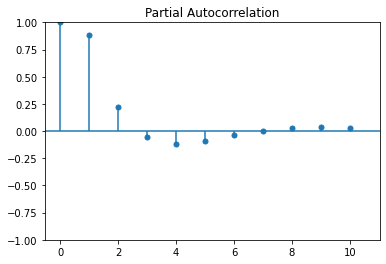

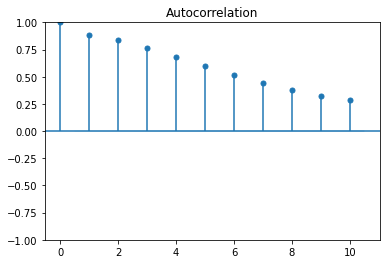

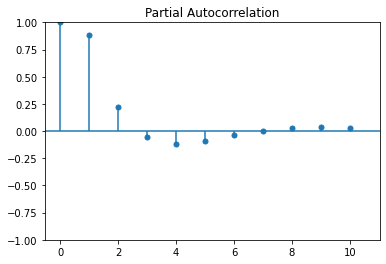

In [125]:
plot_acf(data_train['request_count'], lags=10)
plot_pacf(data_train['request_count'], lags=10)

In [126]:
data_test = data_test.sort_values(by=['pickup_cluster', 'ts']).drop_duplicates(subset=['ts','pickup_cluster'])
temp = pd.concat([data_train,data_test])
temp = temp.sort_values(by=['pickup_cluster', 'ts']).drop_duplicates(subset=['ts','pickup_cluster'])
temp = temp.set_index(['ts', 'pickup_cluster', 'mins','hour', 'month', 'quarter', 'dayofweek'])

temp['lag_1'] = temp.groupby(level=['pickup_cluster'])['request_count'].shift(1)
temp['lag_2'] = temp.groupby(level=['pickup_cluster'])['request_count'].shift(2)
temp['lag_3'] = temp.groupby(level=['pickup_cluster'])['request_count'].shift(3)
temp.head(15)

,,,,,,,request_count,lag_1,lag_2,lag_3
ts,pickup_cluster,mins,hour,month,quarter,dayofweek,,,,
2020-03-26 00:00:00,0,0,0,3,1,3,0,NaN,NaN,NaN
2020-03-26 00:30:00,0,30,0,3,1,3,0,0.0,NaN,NaN
2020-03-26 01:00:00,0,0,1,3,1,3,0,0.0,0.0,NaN
2020-03-26 01:30:00,0,30,1,3,1,3,0,0.0,0.0,0.0
2020-03-26 02:00:00,0,0,2,3,1,3,0,0.0,0.0,0.0
2020-03-26 02:30:00,0,30,2,3,1,3,0,0.0,0.0,0.0
2020-03-26 03:00:00,0,0,3,3,1,3,0,0.0,0.0,0.0
2020-03-26 03:30:00,0,30,3,3,1,3,0,0.0,0.0,0.0
2020-03-26 04:00:00,0,0,4,3,1,3,0,0.0,0.0,0.0


In [127]:
temp = temp.reset_index(drop = False).dropna()
temp = temp[['ts', 'pickup_cluster', 'mins','hour', 'month', 'quarter',
       'dayofweek', 'lag_1', 'lag_2', 'lag_3',
        'request_count']]

In [128]:
temp.shape

(878250, 11)

In [129]:
temp.head()

,ts,pickup_cluster,mins,hour,month,quarter,dayofweek,lag_1,lag_2,lag_3,request_count
3,2020-03-26 01:30:00,0,30,1,3,1,3,0.0,0.0,0.0,0
4,2020-03-26 02:00:00,0,0,2,3,1,3,0.0,0.0,0.0,0
5,2020-03-26 02:30:00,0,30,2,3,1,3,0.0,0.0,0.0,0
6,2020-03-26 03:00:00,0,0,3,3,1,3,0.0,0.0,0.0,0
7,2020-03-26 03:30:00,0,30,3,3,1,3,0.0,0.0,0.0,0


In [130]:
train1 = temp[temp.ts.dt.day <=23]
test1 = temp[temp.ts.dt.day >23]

In [131]:
X = train1.iloc[:, 1:-1]
y = train1.iloc[:, -1]
X_test = test1.iloc[:, 1:-1]
y_test = test1.iloc[:, -1]

In [132]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 500, random_state=0, n_jobs = -1)
regressor.fit(X,y)
print("RMSE TRAIN: {}, RMSE TEST:{}".format(sqrt(mean_squared_error(y, regressor.predict(X))), metrics_calculate(regressor)))

RMSE TRAIN: 0.9578537885805739, RMSE TEST:2.556881420942238


In [133]:
feature_importances = pd.DataFrame(regressor.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
lag_1,0.791254
hour,0.046036
pickup_cluster,0.041643
lag_2,0.038773
lag_3,0.030139
dayofweek,0.020892
month,0.018625
mins,0.008017
quarter,0.004621


In [134]:
import xgboost as xgb
model=xgb.XGBRegressor(learning_rate=0.01, random_state=0, n_estimators=600, max_depth=8, objective="reg:squarederror")

eval_set = [(X_test, y_test)]
model.fit(X,y,verbose=True, eval_set=eval_set, early_stopping_rounds=30,eval_metric="rmse")
print("XGBOOST Regressor")
print("Model Score:",model.score(X,y))
print("RMSE TRAIN: {}, RMSE TEST:{}".format(sqrt(mean_squared_error(y, model.predict(X))), metrics_calculate(model)))


[0]	validation_0-rmse:7.33608


/Users/kunaljain/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/kunaljain/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:7.27356
[2]	validation_0-rmse:7.21173
[3]	validation_0-rmse:7.15073
[4]	validation_0-rmse:7.09030
[5]	validation_0-rmse:7.03050
[6]	validation_0-rmse:6.97144
[7]	validation_0-rmse:6.91301
[8]	validation_0-rmse:6.85538
[9]	validation_0-rmse:6.79833
[10]	validation_0-rmse:6.74173
[11]	validation_0-rmse:6.68604
[12]	validation_0-rmse:6.63102
[13]	validation_0-rmse:6.57637
[14]	validation_0-rmse:6.52249
[15]	validation_0-rmse:6.46930
[16]	validation_0-rmse:6.41659
[17]	validation_0-rmse:6.36467
[18]	validation_0-rmse:6.31328
[19]	validation_0-rmse:6.26249
[20]	validation_0-rmse:6.21231
[21]	validation_0-rmse:6.16280
[22]	validation_0-rmse:6.11375
[23]	validation_0-rmse:6.06548
[24]	validation_0-rmse:6.01779
[25]	validation_0-rmse:5.97044
[26]	validation_0-rmse:5.92383
[27]	validation_0-rmse:5.87786
[28]	validation_0-rmse:5.83225
[29]	validation_0-rmse:5.78727
[30]	validation_0-rmse:5.74297
[31]	validation_0-rmse:5.69893
[32]	validation_0-rmse:5.65542
[33]	validation_0

Iteration3:
Features: ['pickup_cluster', 'mins', 'hour', 'month', 'quarter', 'dayofweek', 'lag_1', 'lag_2', 'lag_3','rolling_mean']

Include: Both Lag Features and Rolling Window
Both of size = 3
lag_{t} = this is simply the request_count of a region {t} mins/hours ago.


rolling_mean: previous 3 days request_count mean

In [135]:
data_test = data_test.sort_values(by=['pickup_cluster', 'ts']).drop_duplicates(subset=['ts','pickup_cluster'])
temp = pd.concat([data_train,data_test])
temp = temp.sort_values(by=['pickup_cluster', 'ts']).drop_duplicates(subset=['ts','pickup_cluster'])
temp = temp.set_index(['ts', 'pickup_cluster', 'mins', 'hour', 'month', 'quarter', 'dayofweek'])

temp['lag_1'] = temp.groupby(level=['pickup_cluster'])['request_count'].shift(1)
temp['lag_2'] = temp.groupby(level=['pickup_cluster'])['request_count'].shift(2)
temp['lag_3'] = temp.groupby(level=['pickup_cluster'])['request_count'].shift(3)
temp['rolling_mean'] = temp.groupby(level=['pickup_cluster'])['request_count'].apply(lambda x: x.rolling(window = 3).mean()).shift(1)

temp = temp.reset_index(drop = False).dropna()
temp = temp[['ts', 'pickup_cluster', 'mins', 'hour', 'month', 'quarter',
       'dayofweek', 'lag_1', 'lag_2', 'lag_3','rolling_mean','request_count']]
train1 = temp[temp.ts.dt.day <=23]
test1 = temp[temp.ts.dt.day >23]

X = train1.iloc[:, 1:-1]
y = train1.iloc[:, -1]
X_test = test1.iloc[:, 1:-1]
y_test = test1.iloc[:, -1]

In [136]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 500, random_state=0, n_jobs = -1)
regressor.fit(X,y)
print("RMSE TRAIN: {}, RMSE TEST:{}".format(sqrt(mean_squared_error(y, regressor.predict(X))), metrics_calculate(regressor)))

RMSE TRAIN: 0.9531267285190343, RMSE TEST:2.5419851376902023


In [137]:
feature_importances = pd.DataFrame(regressor.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
lag_1,0.763508
rolling_mean,0.061361
hour,0.048212
pickup_cluster,0.037153
lag_2,0.024178
lag_3,0.019147
dayofweek,0.018516
month,0.016539
mins,0.007352
quarter,0.004035


In [138]:
import xgboost as xgb
model=xgb.XGBRegressor(learning_rate=0.01, random_state=0, n_estimators=1500, max_depth=8, objective="reg:squarederror")

eval_set = [(X_test, y_test)]
model.fit(X,y,verbose=True, eval_set=eval_set, early_stopping_rounds=20,eval_metric="rmse")
print("XGBOOST Regressor")
print("Model Score:",model.score(X,y))
print("RMSE TRAIN: {}, RMSE TEST:{}".format(sqrt(mean_squared_error(y, model.predict(X))), metrics_calculate(model)))

/Users/kunaljain/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/kunaljain/opt/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:7.33582
[1]	validation_0-rmse:7.27307
[2]	validation_0-rmse:7.21104
[3]	validation_0-rmse:7.14971
[4]	validation_0-rmse:7.08904
[5]	validation_0-rmse:7.02916
[6]	validation_0-rmse:6.96985
[7]	validation_0-rmse:6.91122
[8]	validation_0-rmse:6.85316
[9]	validation_0-rmse:6.79594
[10]	validation_0-rmse:6.73921
[11]	validation_0-rmse:6.68328
[12]	validation_0-rmse:6.62773
[13]	validation_0-rmse:6.57326
[14]	validation_0-rmse:6.51912
[15]	validation_0-rmse:6.46568
[16]	validation_0-rmse:6.41273
[17]	validation_0-rmse:6.36049
[18]	validation_0-rmse:6.30876
[19]	validation_0-rmse:6.25792
[20]	validation_0-rmse:6.20769
[21]	validation_0-rmse:6.15760
[22]	validation_0-rmse:6.10846
[23]	validation_0-rmse:6.05974
[24]	validation_0-rmse:6.01193
[25]	validation_0-rmse:5.96423
[26]	validation_0-rmse:5.91753
[27]	validation_0-rmse:5.87107
[28]	validation_0-rmse:5.82541
[29]	validation_0-rmse:5.78016
[30]	validation_0-rmse:5.73566
[31]	validation_0-rmse:5.69169
[32]	validation_0-

In [139]:
model.predict(X_test)

array([0.12567574, 0.0981112 , 0.11417679, ..., 9.899832  , 5.8674107 ,
       7.7051053 ], dtype=float32)